# Naive

  Implementation  blockSize  av_loop_t  min_loop_t  max_loop_t
0     Sequential         -1   1.842910    1.818861    1.881240
1          Naive         32   0.208797    0.200416    0.280023
2          Naive         64   0.205280    0.196602    0.280644
3          Naive        128   0.205164    0.196455    0.280400
4          Naive        256   0.205174    0.196445    0.280347
5          Naive        512   0.204870    0.196206    0.279817
6          Naive       1024   0.205093    0.196380    0.280370


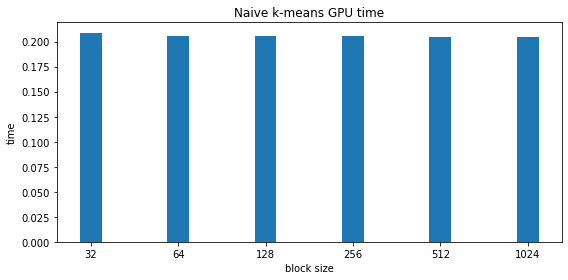

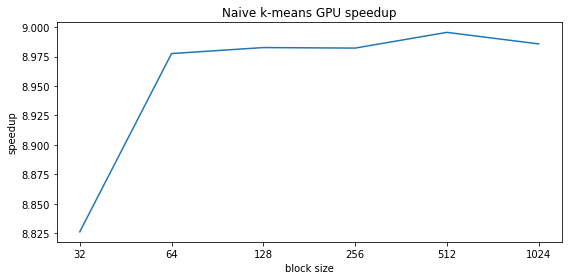

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True

headers = ['blockSize', 'av_loop_t']

df = pd.read_csv('naive.csv')
print(df)

x = ['32', '64', '128', '256', '512', '1024']
ytime = list(i[0] for i in df.iloc[1:,[2]].values.tolist())
yspeedup_naive = (df.iloc[0,[2]].values[0]/ytime)

fig=plt.figure(figsize=(8,4))
plt.title('Naive k-means GPU time')
plt.xlabel('block size')
plt.ylabel('time')
plt.bar(x,ytime, width=0.25)
plt.show()
fig.savefig('naive_time.png')

fig=plt.figure(figsize=(8,4))
plt.title('Naive k-means GPU speedup')
plt.xlabel('block size')
plt.ylabel('speedup')
plt.plot(x,yspeedup_naive)
plt.show()
fig.savefig('naive_speedup.png')

# Transpose

  Implementation  blockSize  av_loop_t  min_loop_t  max_loop_t
0     Sequential         -1   1.845237    1.814885    1.878647
1      Transpose         32   0.201209    0.193072    0.271116
2      Transpose         64   0.188572    0.179108    0.271211
3      Transpose        128   0.188433    0.178931    0.271228
4      Transpose        256   0.188604    0.179037    0.270938
5      Transpose        512   0.188397    0.179017    0.270881
6      Transpose       1024   0.188649    0.179226    0.271210


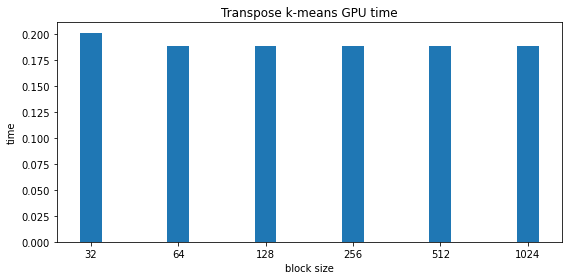

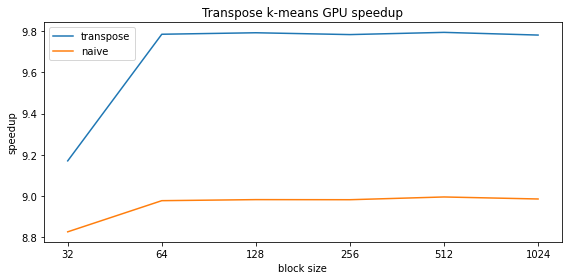

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True

headers = ['blockSize', 'av_loop_t']

df = pd.read_csv('transpose.csv')
print(df)

x = ['32', '64', '128', '256', '512', '1024']
ytime = list(i[0] for i in df.iloc[1:,[2]].values.tolist())
yspeedup_trans = (df.iloc[0,[2]].values[0]/ytime)

fig=plt.figure()
plt.title('Transpose k-means GPU time')
plt.xlabel('block size')
plt.ylabel('time')
plt.bar(x,ytime, width=0.25)
plt.show()
fig.savefig('transpose_time.png')

fig=plt.figure()
plt.title('Transpose k-means GPU speedup')
plt.xlabel('block size')
plt.ylabel('speedup')
plt.plot(x,yspeedup_trans)
plt.plot(x,yspeedup_naive)
plt.legend(['transpose', 'naive'])
plt.show()
fig.savefig('transpose_speedup.png')

# Shared

  Implementation  blockSize  av_loop_t  min_loop_t  max_loop_t
0     Sequential         -1   1.843261    1.816633    1.877267
1          Shmem         32   0.198385    0.190086    0.271283
2          Shmem         64   0.168230    0.156233    0.271199
3          Shmem        128   0.155370    0.141705    0.271415
4          Shmem        256   0.155678    0.141838    0.271342
5          Shmem        512   0.155680    0.141936    0.270676
6          Shmem       1024   0.156630    0.143378    0.271115


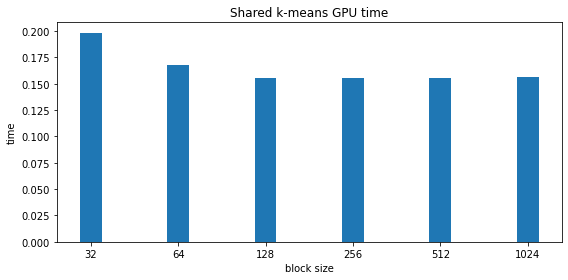

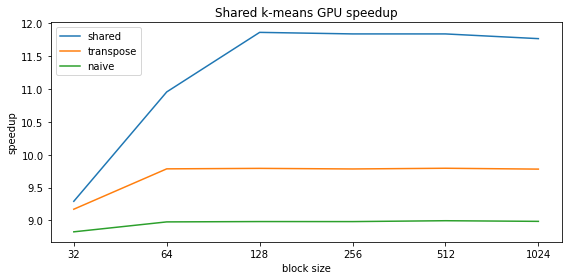

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True

headers = ['blockSize', 'av_loop_t']

df = pd.read_csv('shared.csv')
print(df)

x = ['32', '64', '128', '256', '512', '1024']
ytime = list(i[0] for i in df.iloc[1:,[2]].values.tolist())
yspeedup_shared = (df.iloc[0,[2]].values[0]/ytime)

fig=plt.figure()
plt.title('Shared k-means GPU time')
plt.xlabel('block size')
plt.ylabel('time')
plt.bar(x,ytime, width=0.25)
plt.show()
fig.savefig('shared_time.png')

fig=plt.figure()
plt.title('Shared k-means GPU speedup')
plt.xlabel('block size')
plt.ylabel('speedup')
plt.plot(x,yspeedup_shared)
plt.plot(x,yspeedup_trans)
plt.plot(x,yspeedup_naive)
plt.legend(['shared', 'transpose', 'naive'])
plt.show()
fig.savefig('shared-speedup.png')

# CPU, GPU, transfer times over different implementations

   Implementation  blockSize  av_loop_t  min_loop_t  max_loop_t  time_cpu  \
0           Naive         32   0.131051    0.130837    0.131752  0.212568   
1           Naive         64   0.133038    0.132593    0.135229  0.216003   
2           Naive        128   0.131596    0.131377    0.132505  0.213499   
3           Naive        256   0.131797    0.131566    0.132600  0.213037   
4           Naive        512   0.132298    0.131946    0.133341  0.212973   
5           Naive       1024   0.134509    0.134168    0.135553  0.214122   
6       Transpose         32   0.086405    0.085961    0.087478  0.550263   
7       Transpose         64   0.078003    0.077612    0.079962  0.550838   
8       Transpose        128   0.077264    0.076671    0.079944  0.550088   
9       Transpose        256   0.077525    0.076812    0.080846  0.550252   
10      Transpose        512   0.077479    0.076678    0.081096  0.550019   
11      Transpose       1024   0.078458    0.077998    0.080895  0.550794   

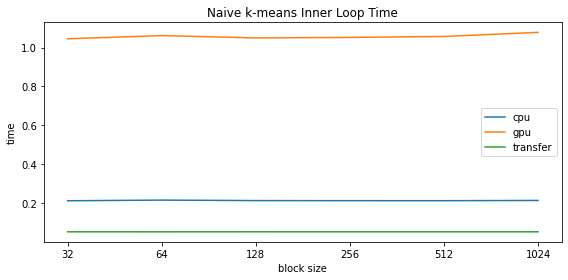

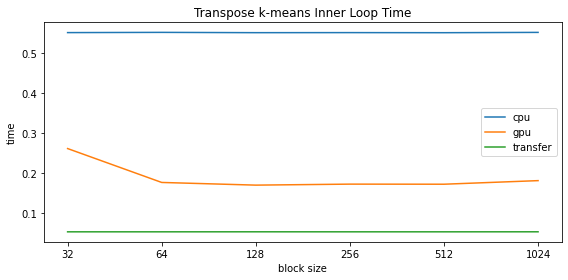

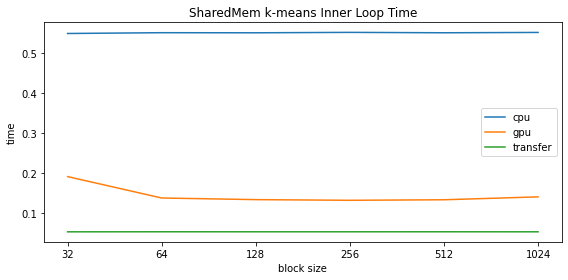

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True

headers = ['blockSize', 'av_loop_t']

df = pd.read_csv('loop_times.csv')
print(df)

x = ['32', '64', '128', '256', '512', '1024']
naive_cpu = list(i[0] for i in df.iloc[0:6,[5]].values.tolist())
naive_gpu = list(i[0] for i in df.iloc[0:6,[6]].values.tolist())
naive_trans = list(i[0] for i in df.iloc[0:6,[7]].values.tolist())

trans_cpu = list(i[0] for i in df.iloc[6:12,[5]].values.tolist())
trans_gpu = list(i[0] for i in df.iloc[6:12,[6]].values.tolist())
trans_trans = list(i[0] for i in df.iloc[6:12,[7]].values.tolist())

shared_cpu = list(i[0] for i in df.iloc[12:18,[5]].values.tolist())
shared_gpu = list(i[0] for i in df.iloc[12:18,[6]].values.tolist())
shared_trans = list(i[0] for i in df.iloc[12:18,[7]].values.tolist())

fig=plt.figure()
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True
plt.title('Naive k-means Inner Loop Time')
plt.xlabel('block size')
plt.ylabel('time')
plt.plot(x,naive_cpu)
plt.plot(x,naive_gpu)
plt.plot(x,naive_trans)
plt.legend(['cpu', 'gpu', 'transfer'])
plt.show()
fig.savefig('naive_innerloop.png')

fig=plt.figure()
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True
plt.title('Transpose k-means Inner Loop Time')
plt.xlabel('block size')
plt.ylabel('time')
plt.plot(x,trans_cpu)
plt.plot(x,trans_gpu)
plt.plot(x,trans_trans)
plt.legend(['cpu', 'gpu', 'transfer'])
plt.show()
fig.savefig('transpose_innerloop.png')

fig=plt.figure()
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True
plt.title('SharedMem k-means Inner Loop Time')
plt.xlabel('block size')
plt.ylabel('time')
plt.plot(x,shared_cpu)
plt.plot(x,shared_gpu)
plt.plot(x,shared_trans)
plt.legend(['cpu', 'gpu', 'transfer'])
plt.show()
fig.savefig('shared_innerloop.png')

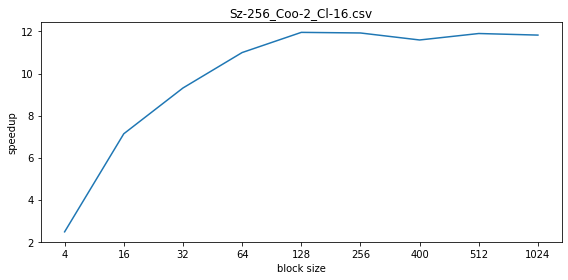

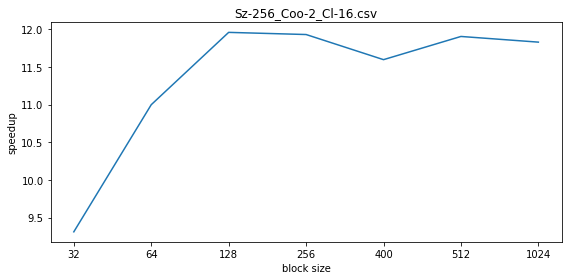

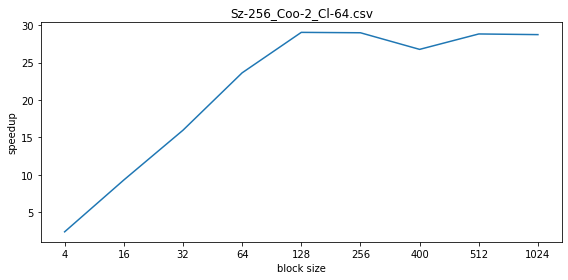

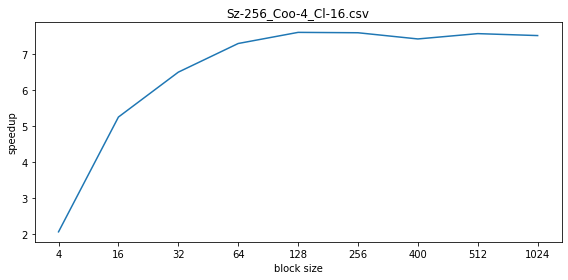

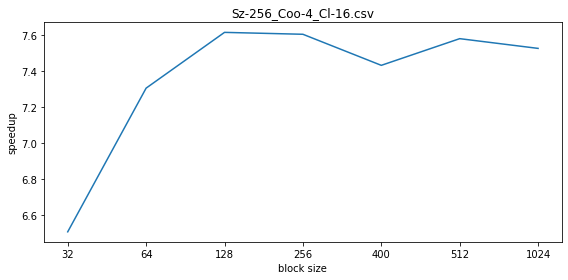

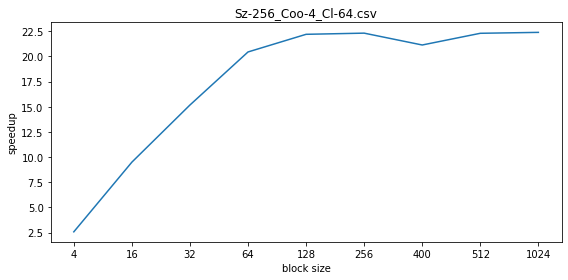

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True

headers = ['blockSize', 'av_loop_t']

def giannos(name, full=True, save=False):
    df = pd.read_csv('/home/winrout/labs/parallel/remote/a3/kmeans/Execution_logs/' + name)
    #print(df)
    if full:
        x = ['4','16','32', '64', '128', '256','400', '512', '1024']
        ytime = list(i[0] for i in df.iloc[1:,[2]].values.tolist())
    else:
        x = ['32', '64', '128', '256','400', '512', '1024']
        ytime = list(i[0] for i in df.iloc[3:,[2]].values.tolist())
    yspeedup_naive = (df.iloc[0,[2]].values[0]/ytime)


    fig=plt.figure(figsize=(8,4))
    plt.title(name)
    plt.xlabel('block size')
    plt.ylabel('speedup')
    plt.plot(x,yspeedup_naive)
    plt.show()
    
    if(save):
        fig.savefig(name+'_shared.png')

giannos('Sz-256_Coo-2_Cl-16.csv', True, True)
giannos('Sz-256_Coo-2_Cl-16.csv', False)
giannos('Sz-256_Coo-2_Cl-64.csv')

giannos('Sz-256_Coo-4_Cl-16.csv')
giannos('Sz-256_Coo-4_Cl-16.csv', False)
giannos('Sz-256_Coo-4_Cl-64.csv')